## Question 2.A

In this question it asks us to create a routine that generate the binomial coefficients given a n and k value.

In [1]:
from math import *
import numpy as np
import time as time
import random as random
import matplotlib.pyplot as plt


def binomialCoeff(n,k):    
    '''
    This function takes two values, n and k, and calculates their binomial
    coefficient
    '''  
    if k>n:
        return 'The value of k cannot be greater than n'
    #Initializing all variables and arrays 
    delete_slice = k-n
    i=0
    j=0    
    numerator = 1
    denominator = 1   
    a = np.arange(n+1,dtype='int64')
    a = np.delete(a,0)
    a = a[delete_slice:] #This is to cancel out some of the factorial terms
    c_size = n-k 
    c = np.arange(c_size+1,dtype='int64')
    c = np.delete(c,0)

    
    #These for loops and if statements are responsible for calculating the 
    #factorials. I Calculate the numerator and denominator terms separately
    if n==k:
        numerator = 1   
    else:
        for i in a:
            numerator = numerator*i       
    for j in c:
        denominator = denominator*j
        
    #Calculating the denominator by multiplying the denominator factors above
    #then dividing the numerator by the denominator to give the binomial coeff
    denominator = denominator
    binomial_coefficient = numerator//denominator
    
    return binomial_coefficient

Here are some binomial coefficients to show it works

In [5]:
print(binomialCoeff(7,2))
print(binomialCoeff(0,0))
print(binomialCoeff(1,0))
print(binomialCoeff(0,1))
print(binomialCoeff(16,5))
print(binomialCoeff(8,4))

21
1
1
The value of k cannot be greater than n
4368
70


## Question 2.B

In this question it asks us to generate the first 20 lines of Pascal's Triangle. We can do this using the binomial coefficent formula in the fisrt part of the question. Each line can be given by n, and each entry of that line 

In [6]:
#Now to write the first 20 lines of pascals triangle. The binomial coefficient
#function can help because n is the line number starting at the zeroth line,
#and k is the number of the entry in the line. k <= n+1
def line_generator(n):
    '''
    This function creates the given line of pascals triangle. For this part of
    the question, the line number is the same thing as n, in the binomial
    coefficient formula
    '''
    #initializing variables and lists
    i = 0
    k = n+1
    line_elements = []
    
    #This for loop calculates each element of the line and appends its value to
    #a list
    for i in range(k):
        entry = binomialCoeff(n,i)
        line_elements.append(entry)

    return line_elements
    


def pascals_triangle(num_lines):
    '''
    Now that we have our functions, let's print out the first 20 lines of
    Pascal's triangle
    
    This function print x amount of lines in Pascal's triangle
    '''
    for i in range(num_lines):
        print(line_generator(i))

In [9]:
(pascals_triangle(20))

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]
[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]
[1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1]
[1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1]
[1, 13, 78, 286, 715, 1287, 1716, 1716, 1287, 715, 286, 78, 13, 1]
[1, 14, 91, 364, 1001, 2002, 3003, 3432, 3003, 2002, 1001, 364, 91, 14, 1]
[1, 15, 105, 455, 1365, 3003, 5005, 6435, 6435, 5005, 3003, 1365, 455, 105, 15, 1]
[1, 16, 120, 560, 1820, 4368, 8008, 11440, 12870, 11440, 8008, 4368, 1820, 560, 120, 16, 1]
[1, 17, 136, 680, 2380, 6188, 12376, 19448, 24310, 24310, 19448, 12376, 6188, 2380, 680, 136, 17, 1]
[1, 18, 153, 816, 3060, 8568, 18564, 31824, 43758, 48620, 43758, 31824, 18564, 8568, 3060, 816, 153, 18, 1]
[1, 19, 171, 969, 3876, 11628, 27132, 50388, 75582, 92378, 92378, 75582, 50388, 27132, 11628, 3876, 969, 171, 19, 1]


## Question 2.C

In this problem we code the bent coin probability function and use it to determine the probability of a batter with p=0.25 hitting a ball once in 4 tries

In [12]:
def coin_prob(n,k,p):
    '''
    This is the coin probability function, using the binomial coefficient fn
    
    Here we are physically flipping the coin n times, and hoping to get heads
    k times
    '''
    prob = binomialCoeff(n,k)*(p**(k))*(1-p)**(n-k)
    return prob


#The print below is telling me that the probability of any of the combinations
#below totals to 1. As expected
#print(coin_prob(4,0,0.5)+coin_prob(4,1,0.5)+coin_prob(4,2,0.5)+coin_prob(4,3,0.5)+coin_prob(4,4,0.5))
print('The probability of the batter hitting the ball once in four tries is', coin_prob(4,1,0.25))

The probability of the batter hitting the ball once in four tries is 0.421875


## Question 2.D

In this problem we simulate a batter with p = 0.25, to see how many times they manage to hit the ball in N tries.

For N=10 20.0 % of the hits were successful
For N=100 19 % of the hits were successful
For N=1000 23.3 % of the hits were successful


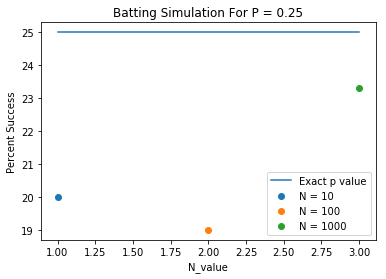

In [17]:
#Here we are simulating, a baseball player with p = 0.25. We will use a random
#number generator to obtain a number between 0 and 1. If the number is less
#than 0.25, it will be recorded as a hit, if it is greater it is a miss

def hit_or_miss(N):
    hits = 0
    misses = 0
    for i in range(N):
        hit_miss = random.random()
        if hit_miss >= 0.25:
            misses += 1
        elif hit_miss <= 0.25:
            hits += 1
        else:
            print('Something wrong happened')
    return hits,misses


N10 = hit_or_miss(10)
N100 = hit_or_miss(100)
N1000 = hit_or_miss(1000)


print('For N=10', N10[0]/10*100,'% of the hits were successful')
print('For N=100', N100[0],'% of the hits were successful')
print('For N=1000', N1000[0]/10,'% of the hits were successful')


N_array = [N10[0]/10*100,N100[0],N1000[0]/10]
x_vals = [1,2,3]
p_value = [25]*3 #In percent, not decimal


plt.scatter(1,N10[0]/10*100, label = 'N = 10')
plt.scatter(2,N100[0], label = 'N = 100')
plt.scatter(3,N1000[0]/10, label = 'N = 1000')
plt.plot(x_vals,p_value, label = 'Exact p value')
plt.xlabel('N_value')
plt.ylabel('Percent Success')
plt.title('Batting Simulation For P = 0.25')
plt.legend()
plt.show()